# Cats vs Dog Image Classifier App 
=====================================<br>
In this notebook , we will create a simple image classifier using TensorFlow and Keras to classify images of cats and dogs.Following Steps will be covered from loading the dataset to training the model and evaluating its performance.

# Steps 
1. [Loading the Dataset](#loading-the-dataset)
2. [Data Pre-processing](#data-pre-processing)
3. [Build CNN Model](#building-the-cnn-model)
4. [Train the Model](#train-the-model)
5. [Evaluate the Model](#evaluation-the-model)
6. [Testing the Model](#testing-the-model)
7. [Saving the Model](#saving-a-model)

## Loading the Dataset & view sample images

### importing the libraries 

1. **import os**:
     * provides functions to interact with the operating system, such as reading file paths, creating directories, and listing files. 
2. **import matplotlib.pyplot as plt**:
    * This is used for data visualization. It allows you to plot graphs and display images. 
3. **from PIL import Image**:
    * The PIL (Python Imaging Library) or its fork Pillow provides functionality for opening, manipulating, and saving many different image file formats. 

In [1]:
#importing the libraries 

import os
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# setting path to training data
train_path = "./Dataset/cats_vs_dogs_dataset/train


### loading the images
We will randomly selects and displays 9 images from the training dataset using PIL and matplotlib. It helps visualize the data distribution before training.

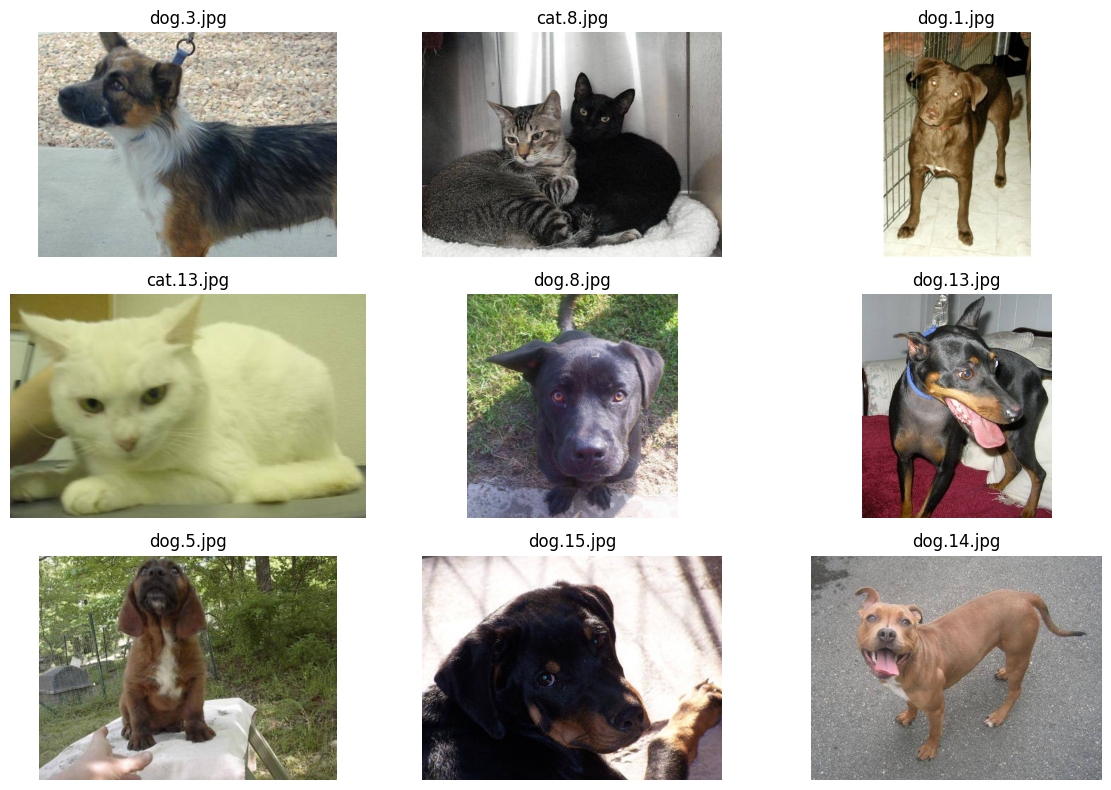

In [5]:
# loading sample images
all_images = os.listdir(train_path)
import random
random.shuffle(all_images)


# Shuffle the list for randomness

# Display 9 sample images
plt.figure(figsize=(12, 8))
for i in range(9):
    file = all_images[i]
    img_path = os.path.join(train_path, file)
    img = Image.open(img_path)
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(file)
    plt.axis("off")

plt.tight_layout()
plt.show()


## Data pre-processing
As the most important step is to understand the data . <br>
**Observation & Step**:
* as all images of cats and dogs for training is in the folder.we can make them into seperate folder for better understanding with names cats and dogs.
* Next is to make sure all images are in same size 
* divide the training data into training data and evaluation data

### Organizing Dataset into Folders
Following code  organizes training images by moving cat and dog images into separate folders (cats/ and dogs/) based on their filenames. It ensures the dataset is structured properly for model training.

In [6]:
import os
import shutil

# Set path to your train directory
train_dir = './Dataset/cats_vs_dogs_dataset/train'  # Change if needed

# New subfolders
cat_dir = os.path.join(train_dir, 'cats')
dog_dir = os.path.join(train_dir, 'dogs')

# Create folders if they don't exist
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Move only files (skip existing folders)
for file in os.listdir(train_dir):
    file_path = os.path.join(train_dir, file)
    
    # Skip if not a file (i.e., is a directory)
    if not os.path.isfile(file_path):
        continue

    if file.lower().startswith('cat'):
        shutil.move(file_path, os.path.join(cat_dir, file))
    elif file.lower().startswith('dog'):
        shutil.move(file_path, os.path.join(dog_dir, file))

print("✅ Files moved to 'cats/' and 'dogs/' successfully.")


✅ Files moved to 'cats/' and 'dogs/' successfully.



### Image Preprocessing & Augmentation
will be  uses ImageDataGenerator to preprocess images and apply data augmentation for the training set (like rotation, zoom, flips) to improve model generalization. It splits the data into 80% training and 20% validation, resizes images to 150×150, and normalizes pixel values.
<br>
**overview**
* Resizing all images to the same size (e.g., 150x150)
* Normalizing pixel values (scale to [0, 1])
* Applying  data augmentation for training
* Splittinf data into 80% training / 20% validation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set directory
train_dir = './Dataset/cats_vs_dogs_dataset/train'  # adjust if needed

# Image settings
img_size = (150, 150)
batch_size = 32

# Create ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation generator (no augmentation, just rescaling)
valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Flow validation images in batches
validation_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Building the CNN model 

A CNN (Convolutional Neural Network) is defined using Keras Sequential API.
* It includes 3 convolutional layers with increasing filters (32, 64, 128) and MaxPooling to reduce dimensions.
* A Flatten layer converts features to 1D, followed by Dropout (0.5) to prevent overfitting.
* The model ends with two Dense layers—one with 512 units (ReLU) and the final one with a sigmoid for binary classification (Cat vs Dog).
* It’s compiled with Adam optimizer and binary crossentropy loss.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification (cat vs dog)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

~19 million trainable parameters, which is solid for this task. Now, let's train it on the dataset.

## Train the Model 
The model is trained using model.fit() for 10 epochs with:

* train_generator providing augmented training images.
* validation_generator for real-time validation on unseen data.
* This helps the model learn features of cats and dogs while tracking its performance on validation data to avoid overfitting.

In [15]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can increase later if needed
    validation_data=validation_generator
)


Epoch 1/10


c:\Users\bashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 879s 1s/step - accuracy: 0.5826 - loss: 0.6796 - val_accuracy: 0.7256 - val_loss: 0.5336
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.7043 - loss: 0.5638 - val_accuracy: 0.7848 - val_loss: 0.4676
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 476s 758ms/step - accuracy: 0.7429 - loss: 0.5185 - val_accuracy: 0.8036 - val_loss: 0.4251
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 400s 638ms/step - accuracy: 0.7652 - loss: 0.4837 - val_accuracy: 0.8198 - val_loss: 0.4061
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 421s 672ms/step - accuracy: 0.7937 - loss: 0.4401 - val_accuracy: 0.8320 - val_loss: 0.3827
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 416s 663ms/step - accuracy: 0.8043 - loss: 0.4253 - val_accuracy: 0.8362 - val_loss: 0.3689
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 400s 638ms/step - accuracy: 0.8182 - loss: 0.4057 - val_accuracy: 0.8462 - val_loss: 0.3607
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 404s 646ms/step - accuracy: 0.8193 - loss: 0.4030 - v

Training Accuracy: 83.01%

Validation Accuracy: 84.5%

This shows it's performing well and not 

## Evaluation the Model 
The model.evaluate() function checks model performance on the validation set.
It returns:

**Validation Accuracy**: how well the model classifies new cat/dog images.
**Validation Loss**: how much error the model makes on unseen data.

In [16]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 164ms/step - accuracy: 0.8499 - loss: 0.3610
Validation Accuracy: 84.52%
Validation Loss: 0.3525


### Plot accuracy and loss curves
Following cell  visualizes model performance over epochs:

* **Accuracy Plot**shows how well the model learns during training and how it performs on unseen validation data.
* **Loss Plot reveals** how much error the model is making over time.

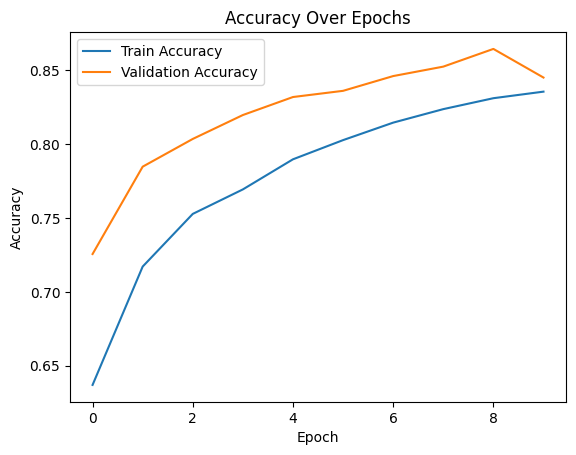

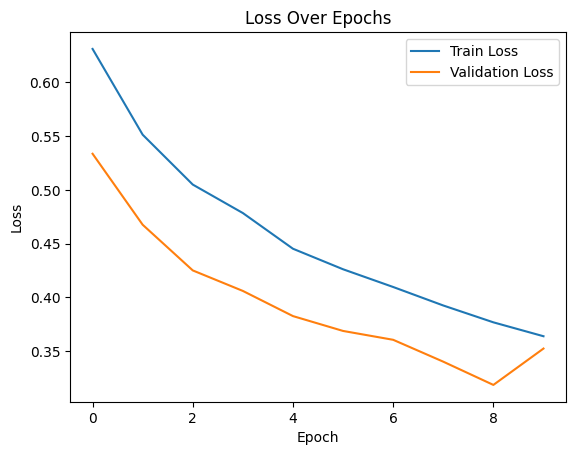

In [17]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Evaluation Metrics

157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step
📊 Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      0.40      0.44      2500
         Dog       0.50      0.60      0.54      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.49      5000
weighted avg       0.50      0.50      0.49      5000



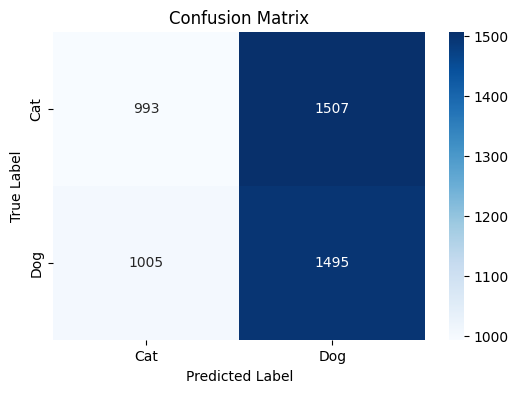

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
Y_true = validation_generator.classes
Y_pred = model.predict(validation_generator)
Y_pred_classes = (Y_pred > 0.5).astype(int).reshape(-1)

# Classification report
print("📊 Classification Report:")
print(classification_report(Y_true, Y_pred_classes, target_names=['Cat', 'Dog']))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Testing the Model 
Will be loading the first 5 images from the test set, preprocesses them, and uses the trained model to predict whether each image is a cat or a dog. The prediction is shown with a confidence score, and results are visualized using Matplotlib.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


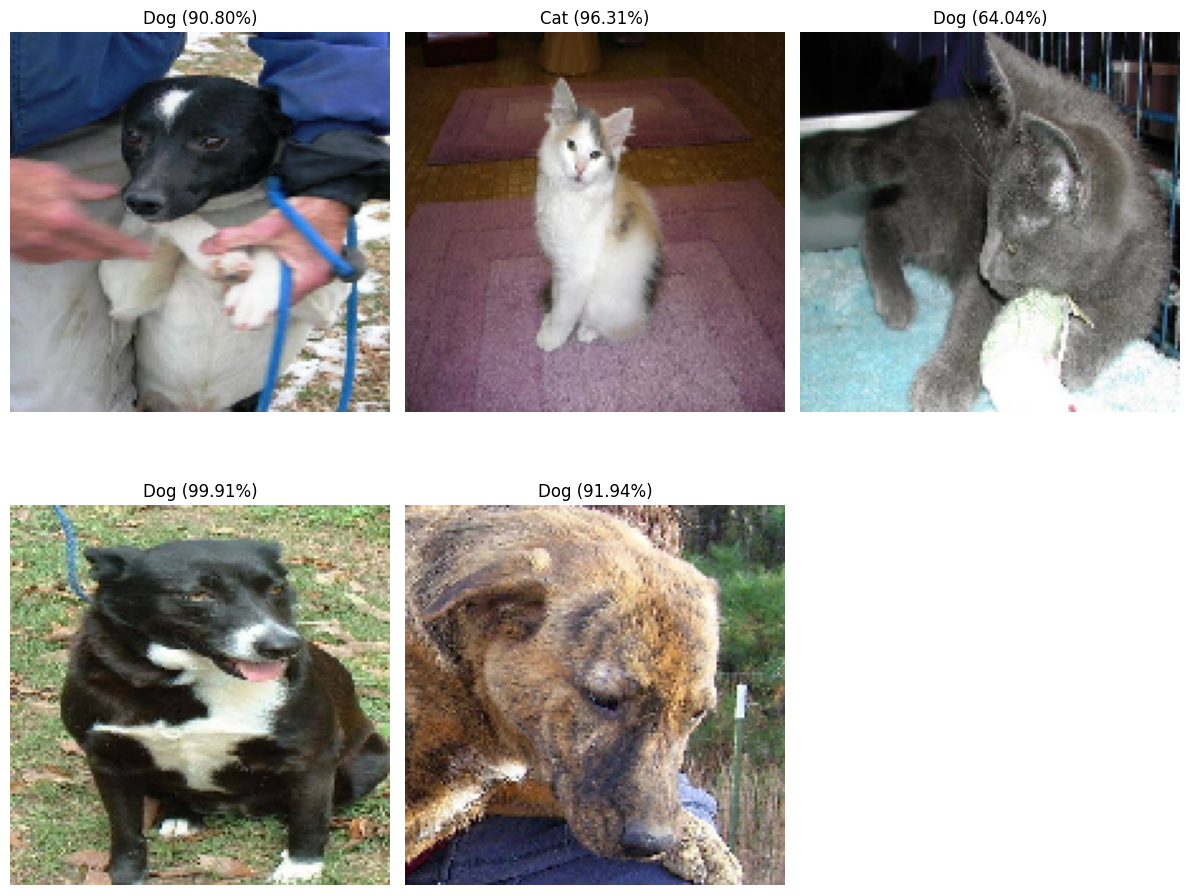

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Class labels
class_names = ['cat', 'dog']

# Path to test images
test_folder = './Dataset/cats_vs_dogs_dataset/test/test'

# Predict on first 5 test images
plt.figure(figsize=(12, 10))

for i, img_name in enumerate(sorted(os.listdir(test_folder))[:5]):  # change range if needed
    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array_expanded)
    confidence = float(prediction[0][0])

    # Interpret prediction
    if confidence < 0.5:
        label = 'Cat'
        confidence = 1 - confidence
    else:
        label = 'Dog'

    # Plot image
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"{label} ({confidence*100:.2f}%)")

plt.tight_layout()
plt.show()


## Saving a model  
After training, the model is saved using the .save() method. This stores the entire architecture, weights, and optimizer state in a single .h5 file, making it easy to reuse or deploy later.    

In [20]:
model.save("cat_dog_classifier.h5")
